# CLASE 32 - Repaso de visualizaciones
### Coderhouse - Data Science


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# Omitir warnings
import warnings
warnings.filterwarnings('ignore')

# Lectura de csv
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv', index_col=0)
df.head()


mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                     
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
rownames                 
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


rownames: El nombre del modelo de automóvil.

mpg: Millas por galón (rendimiento de combustible en millas por galón).

cyl: Número de cilindros del motor.

disp: Desplazamiento del motor (en pulgadas cúbicas).

hp: Potencia neta del motor (en caballos de fuerza).

drat: Relación del eje trasero (drivetrain).

wt: Peso del automóvil (en miles de libras).

qsec: Tiempo de cuarto de milla (en segundos).

vs: Tipo de motor (0 = motor en V, 1 = motor en línea).

am: Transmisión (0 = automática, 1 = manual).

gear: Número de engranajes.

carb: Número de carburadores.

# Scatterplot

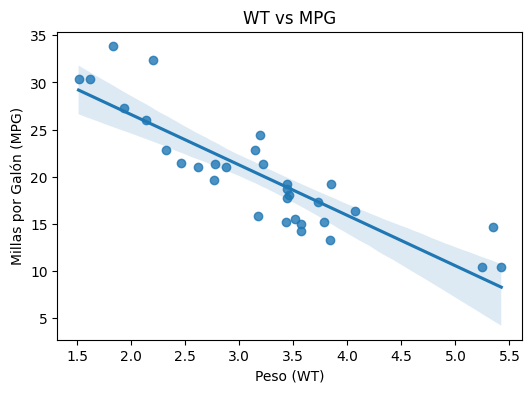

In [ ]:
# tamaño de figura
fig = plt.figure(figsize=(6, 4))

# Grafico

# mpg millas por galón en español, que es una medida utilizada para indicar la eficiencia de combustible
# wt es es peso en español o "weight" en inglés

# gráfico de dispersión para visualizar la relación entre dos variables,  (wt) y (mpg)
ax = sns.regplot(x="wt", y="mpg", data=df)
ax.set(xlabel='Peso (WT)', ylabel='Millas por Galón (MPG)')
plt.title('WT vs MPG')


plt.show()

# Histograma

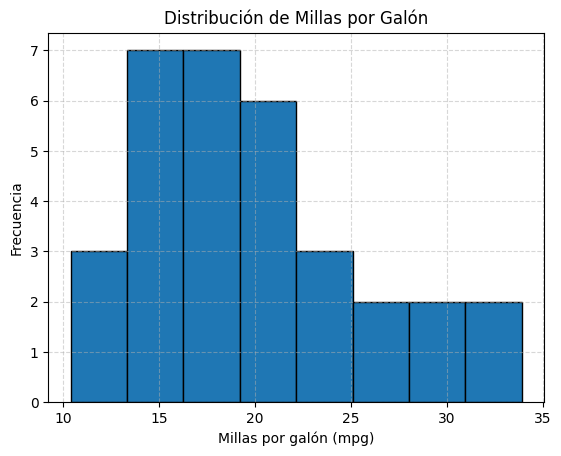

In [ ]:
# Histograma

# crear un histograma para visualizar la distribución de las millas por galón (mpg) en los autos

plt.hist(df['mpg'], bins=8, edgecolor='black')
plt.xlabel('Millas por galón (mpg)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Millas por Galón')
plt.grid(True, linestyle='--', alpha=0.5)  # Agregar líneas de cuadrícula
plt.show()

# Barplot

In [ ]:


# Vamos a utilizar un gráfico de barras para comparar el número de cilindros (cyl) en los diferentes automóviles

# Hacer la agrupacion
df_grpd = df.groupby("cyl").size().reset_index()

df_grpd

cyl   0
0    4  11
1    6   7
2    8  14

In [ ]:
df_grpd.rename(columns={0:"total"}, inplace=True)
df_grpd


cyl  total
0    4     11
1    6      7
2    8     14

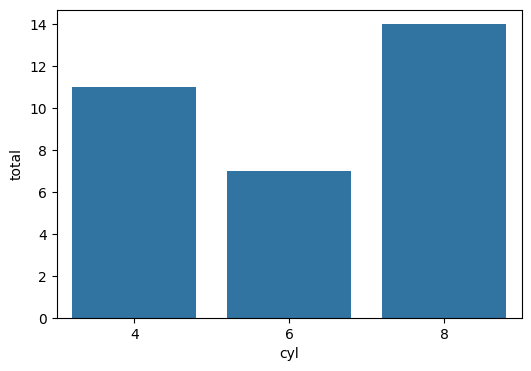

In [ ]:
# Grafico
fig = plt.figure(figsize=(6, 4))
sns.barplot(x="cyl", y="total", data=df_grpd)
ax.set(xlabel='Cylinders', ylabel='Number of Cars for Each Cylinder')
plt.show()

# Box-Plot

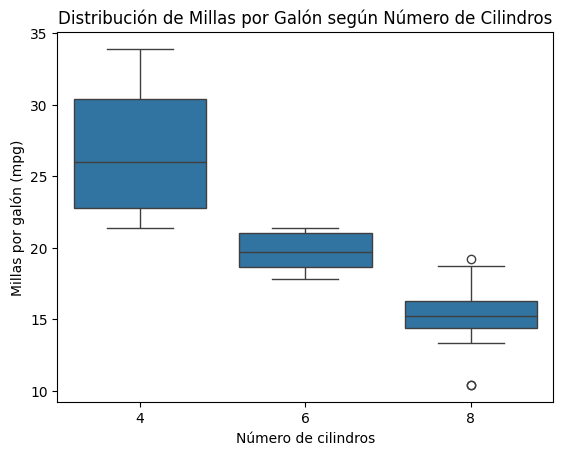

In [ ]:
# Gráfico de caja

# utilizar un gráfico de caja para visualizar la distribución de diferentes variables, como el consumo de gasolina (mpg) según el número de cilindros (cyl).


sns.boxplot(x='cyl', y='mpg', data=df)
plt.xlabel('Número de cilindros')
plt.ylabel('Millas por galón (mpg)')
plt.title('Distribución de Millas por Galón según Número de Cilindros')
plt.show()

# Gráfico de calor

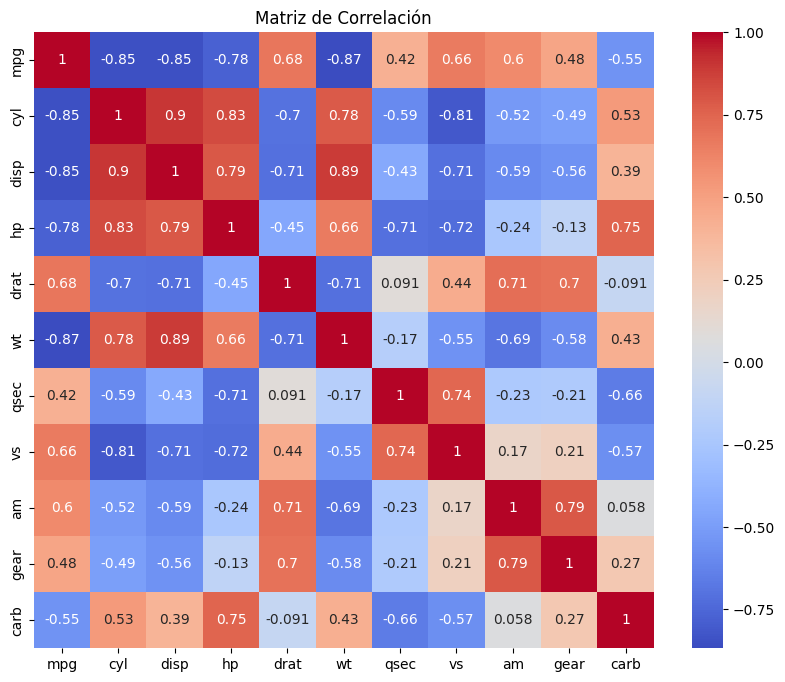

In [ ]:
# Calcular matriz de correlación
corr_matrix = df.corr()

#mapa de calor para visualizar la correlación entre las diferentes variables numéricas del dataset.

# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

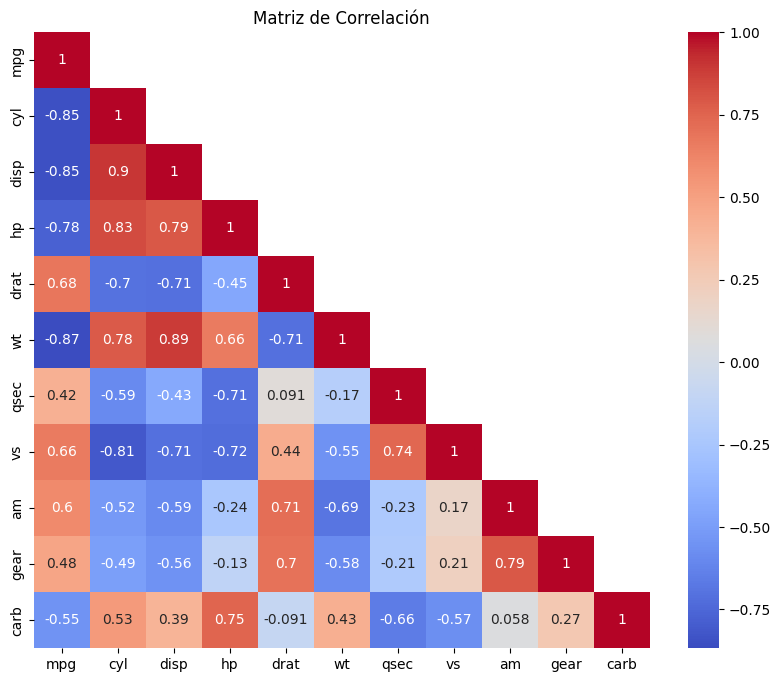

In [ ]:
# Triangular superiormente la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Gráfico de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, square=True)
plt.title('Matriz de Correlación')
plt.show()

# Ejemplo de un mal gráfico, no recomendado

In [ ]:
# Contar la frecuencia de cada modelo de automóvil
autos_por_modelo = df.index.value_counts()
autos_por_modelo

Mazda RX4              1
Mazda RX4 Wag          1
Maserati Bora          1
Ferrari Dino           1
Ford Pantera L         1
Lotus Europa           1
Porsche 914-2          1
Fiat X1-9              1
Pontiac Firebird       1
Camaro Z28             1
AMC Javelin            1
Dodge Challenger       1
Toyota Corona          1
Toyota Corolla         1
Honda Civic            1
Fiat 128               1
Chrysler Imperial      1
Lincoln Continental    1
Cadillac Fleetwood     1
Merc 450SLC            1
Merc 450SL             1
Merc 450SE             1
Merc 280C              1
Merc 280               1
Merc 230               1
Merc 240D              1
Duster 360             1
Valiant                1
Hornet Sportabout      1
Hornet 4 Drive         1
Datsun 710             1
Volvo 142E             1
Name: rownames, dtype: int64

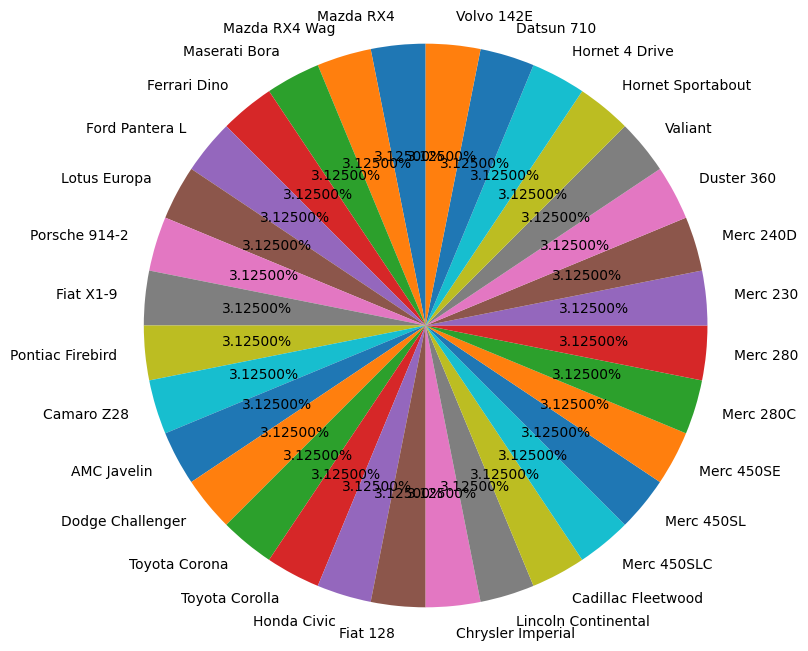

In [ ]:
# Contar la frecuencia de cada modelo de automóvil
autos_por_modelo = df.index.value_counts()

# Obtener los nombres de los modelos y las cantidades
nombres_modelos = autos_por_modelo.index.tolist()
cantidades = autos_por_modelo.values.tolist()


# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=nombres_modelos, autopct='%1.5f%%', startangle=90)
plt.axis('equal')  # Para que la torta sea un círculo perfecto
plt.show()

 Los gráficos de torta son más adecuados cuando se tienen unas pocas categorías distintas y se desea mostrar la proporción de cada categoría con respecto al total. Sino se superponen visualmente la información.

otros puntos que lo hacen bastante malo:

 * No tiene un titulo.
 * Tiene demasiados decimales



# Gráfico circular

In [ ]:
df['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

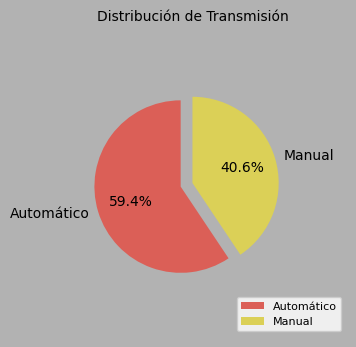

In [ ]:
fig,ax = plt.subplots(figsize =(6,4))
fig.set_facecolor('#b2b2b2') #cambia el fondo del gráfico, por defecto es blanco, se puede usar directamente grey
# Obtener los nombres de las categorías
nombres_transmision = ['Automático', 'Manual']
"""
#b2b2b2 es un valor hexadecimal que representa un color en el modelo de colores RGB (rojo, verde y azul)
utilizado en la programación y el diseño. Los valores hexadecimales se utilizan para representar los valores de los componentes rojo, verde y azul
(en ese orden) en un solo número de 6 dígitos.

Revisar colores en https://www.color-hex.com/color-palettes/

En este caso, #b2b2b2 representa un gris medio, donde el componente rojo tiene un valor de b2 en hexadecimal (178 en decimal),
el componente verde tiene un valor de b2 en hexadecimal (178 en decimal) y el componente azul tiene un valor de b2 en hexadecimal (178 en decimal).

Este valor hexadecimal se puede utilizar en diferentes contextos en los que se necesite especificar un color,
como en el fondo de una figura o en el color de una línea o una barra en un gráfico.

"""

ax.pie(df['am'].value_counts(), labels = nombres_transmision, radius=0.7, startangle=90, explode= (0.1,0), autopct= "%1.1f%%", colors=sns.color_palette("hls",7))

"""
labels: lista con los nombres de las etiquetas que se mostrarán en el gráfico.
radius: radio del gráfico circular.
startangle: ángulo inicial de la primera división del gráfico.
explode: lista que especifica la separación de cada división del gráfico circular respecto al centro.
autopct="%1.1f%%" significa que se mostrará el valor porcentual con un decimal y un signo de porcentaje
colors: es una variable que se utiliza para almacenar una paleta de colores generada con la función color_palette() del paquete seaborn en Python.
"""
plt.title('Distribución de Transmisión', fontsize=10)
plt.legend(loc="lower right",labels=nombres_transmision,fontsize=8)
plt.show()

# Series de tiempo

Text(0.5, 1.0, 'Viajes por mes')

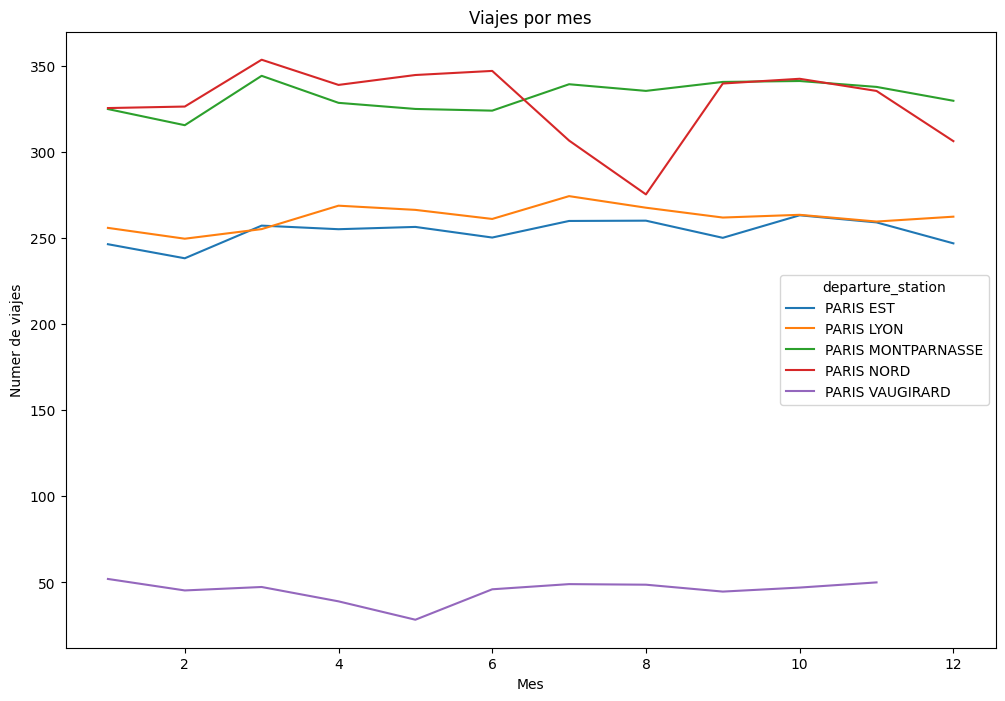

In [ ]:
import pandas as pd
import seaborn as sns

df_viajes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-02-26/full_trains.csv")

plt.figure(figsize=(12, 8))
sns.lineplot(x="month", y="total_num_trips", hue="departure_station",
             ci=None, data=df_viajes[df_viajes.departure_station.str.contains('PARIS')])
plt.xlabel('Mes')
plt.ylabel('Numer de viajes')
plt.title('Viajes por mes')

# Siempre que hablemos de series temporales la recomendación es usar gráficos de linea

# Repasemos los outliers

In [ ]:
# en el Box-plots identificamos algunos valores outliers para 8 cilindros, vamos analizarlo

df_8cyl= df[df.cyl==8]
df_8cyl

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                       
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 450SE           16.4    8  275.8  180  3.07  4.070  17.40   0   0     3   
Merc 450SL           17.3    8  275.8  180  3.07  3.730  17.60   0   0     3   
Merc 450SLC          15.2    8  275.8  180  3.07  3.780  18.00   0   0     3   
Cadillac Fleetwood   10.4    8  472.0  205  2.93  5.250  17.98   0   0     3   
Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0     3   
Chrysler Imperial    14.7    8  440.0  230  3.23  5.345  17.42   0   0     3   
Dodge Challenger     15.5    8  318.0  150  2.76  3.520  16.87   0   0     3   
AMC Javelin          15.2    8  304.0  150  3.15  3.435  17.30   0   0     3   
Camaro Z28           13.3    8  350.0  245  3.73  3.840  15.41   0   0     3   
Pontiac Firebird     19.2    8  400.0  175  3.08  3.845  17.05   0   0     3   
Ford Pantera L       15.8    8  351.0  264  4.22  3.170  14.50   0   1     5   
Maserati Bora        15.0    8  301.0  335  3.54  3.570  14.60   0   1     5   

                     carb  
rownames                   
Hornet Sportabout       2  
Duster 360              4  
Merc 450SE              3  
Merc 450SL              3  
Merc 450SLC             3  
Cadillac Fleetwood      4  
Lincoln Continental     4  
Chrysler Imperial       4  
Dodge Challenger        2  
AMC Javelin             2  
Camaro Z28              4  
Pontiac Firebird        2  
Ford Pantera L          4  
Maserati Bora           8

In [ ]:
q1 = np.percentile(df_8cyl.mpg, 25)
q3 = np.percentile(df_8cyl.mpg, 75)
iqr = q3 - q1

In [ ]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [ ]:
outliers = df_8cyl[(df_8cyl.mpg < limite_inferior) | (df_8cyl.mpg > limite_superior)]
outliers


mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                       
Cadillac Fleetwood   10.4    8  472.0  205  2.93  5.250  17.98   0   0     3   
Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0     3   
Pontiac Firebird     19.2    8  400.0  175  3.08  3.845  17.05   0   0     3   

                     carb  
rownames                   
Cadillac Fleetwood      4  
Lincoln Continental     4  
Pontiac Firebird        2

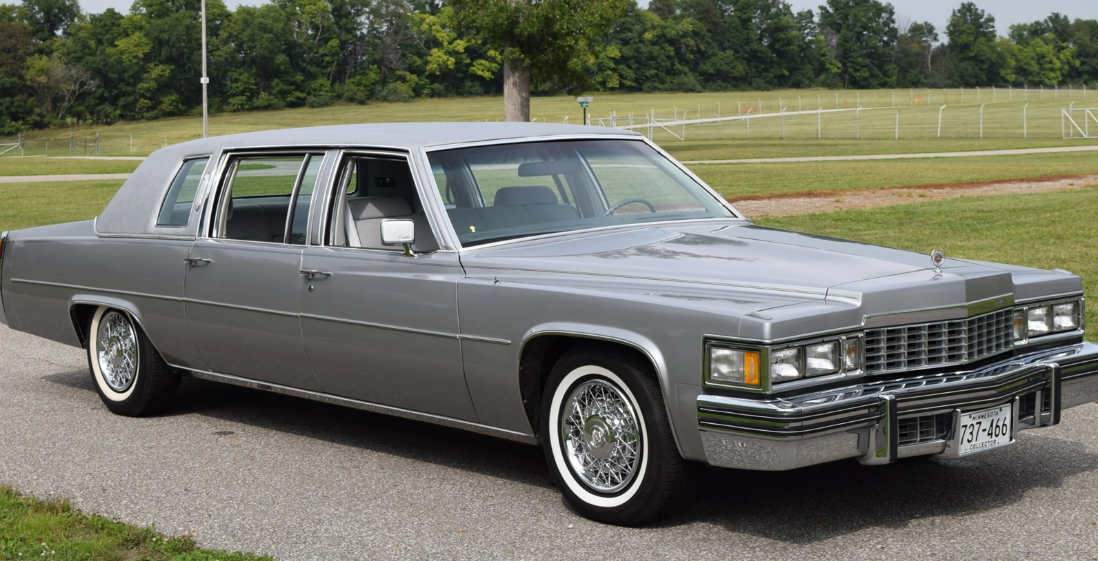

In [ ]:
# el peso de este tipo de autos es muy por encima de la mediana dentro de los 8 cyl

df_8cyl.describe().round(1)

mpg   cyl   disp     hp  drat    wt  qsec    vs    am  gear  carb
count  14.0  14.0   14.0   14.0  14.0  14.0  14.0  14.0  14.0  14.0  14.0
mean   15.1   8.0  353.1  209.2   3.2   4.0  16.8   0.0   0.1   3.3   3.5
std     2.6   0.0   67.8   51.0   0.4   0.8   1.2   0.0   0.4   0.7   1.6
min    10.4   8.0  275.8  150.0   2.8   3.2  14.5   0.0   0.0   3.0   2.0
25%    14.4   8.0  301.8  176.2   3.1   3.5  16.1   0.0   0.0   3.0   2.2
50%    15.2   8.0  350.5  192.5   3.1   3.8  17.2   0.0   0.0   3.0   3.5
75%    16.2   8.0  390.0  241.2   3.2   4.0  17.6   0.0   0.0   3.0   4.0
max    19.2   8.0  472.0  335.0   4.2   5.4  18.0   0.0   1.0   5.0   8.0

 Es de esperar que con tanto peso su mpg sea bastante bajo.  Esto se debe a que un vehículo más pesado requiere más energía para moverse y, por lo tanto, consume más combustible.

 Por otro lado, el pontiac es un auto deportivo mucho más moderno. Al tener motores de alto rendimiento y una aerodinámica más optimizada puede llegar a ser más eficiente en el manejo de combustible.

 En ambos casos, es necesario hacer un análisis más profundo y siempre tratar con especialistas en estos temas.

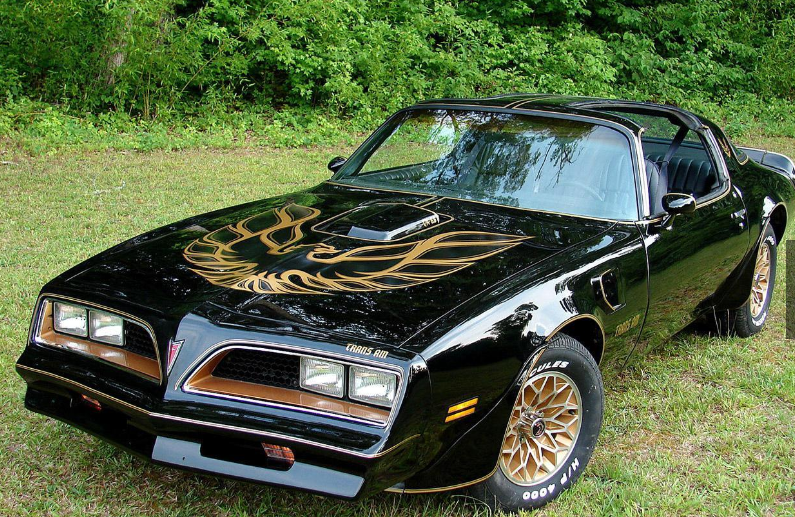